In [6]:
from config import int_key
import requests
import json
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm


In [30]:
#Get only weekdays in an array so we can search the News API
Tickers= ["AAPL", "BAC", "VZ", "WMT", "XOM", "AMZN",]
stock = requests.get(f"https://api.iextrading.com/1.0/stock/{Tickers[0]}/chart/1m")
stocks = stock.json()
dates = []

for i in range(len(stocks)):
    dates.append(stocks[i]["date"])
dates.insert(0, '2018-12-20')
dates

['2018-12-20',
 '2018-12-17',
 '2018-12-18',
 '2018-12-19',
 '2018-12-20',
 '2018-12-21',
 '2018-12-24',
 '2018-12-26',
 '2018-12-27',
 '2018-12-28',
 '2018-12-31',
 '2019-01-02',
 '2019-01-03',
 '2019-01-04',
 '2019-01-07',
 '2019-01-08',
 '2019-01-09',
 '2019-01-10',
 '2019-01-11',
 '2019-01-14',
 '2019-01-15',
 '2019-01-16',
 '2019-01-17',
 '2019-01-18']

In [32]:
article_headline = []
date_published = []
body = []
import aylien_news_api
from aylien_news_api.rest import ApiException

# Configure API key authorization: app_id
aylien_news_api.configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = 'abf8f744'
# Configure API key authorization: app_key
aylien_news_api.configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = '2ca6bef1e403bc29c894f40e79feaf14'

# create an instance of the API class
api_instance = aylien_news_api.DefaultApi()
for i in tqdm(range(len(dates))):
    opts = {
      'body': 'Bank of America',
      'title': 'Bank of America',
      'language': ['en'],
      'not_language': ['es', 'it'],
      'published_at_start': f"{dates[i]}T01:00:10Z",
      'published_at_end': f"{dates[i]}T23:00:10Z",
      'per_page': 100,
      'entities_body_text': [
        'Bank of America']  
      #'cursor': 'AoJw6uq3sOgCL1N0b3J5IDIyMjEwMTA4OQ=='

    }

    try:
        # List stories
        api_response = api_instance.list_stories(**opts)

    #     print("API called successfully. Returned data: ")
    #     print("========================================")
        for story in api_response.stories:

            article_headline.append(story.title)
            date_published.append(story.published_at.date())
            body.append(story.body)

    except ApiException as e:
        print("Exception when calling DefaultApi->list_stories: %sn" % e)


 38%|███▊      | 9/24 [00:37<00:47,  3.18s/it]

KeyboardInterrupt: 

In [7]:
len(article_headline)

1717

In [9]:
article_sentiment = []
article_date = []
for i in range(len(article_headline)):
    #Request the sentiment
    try:
        url = f"http://api.intellexer.com/analyzeSentiments?apikey={int_key}"
        sentiment = requests.post(url, data= json.dumps([{"id": "1", "text": article_headline[i] + body[i]}]),headers = {"Content-Type": "application/json", "Cache-Control": "no-cache"}).json()
        article_date.append(date_published[i])
        article_sentiment.append(float(sentiment['sentiments'][0]['w']))
    except:
        continue

In [10]:
len(article_date)

1712

In [11]:
company_cols = {"Date": article_date,
                "Sentiment": article_sentiment}
company_data = pd.DataFrame(company_cols)
#export to csv when ready
company_data.to_csv(f"Sentiments/BofA__sentiments_final.csv")

In [ ]:
#Create a function to print out ticker prices for the dates
def get_stock_csv(ticker):
    change = []
    stock_date = []
    date = []
    stock = requests.get(f"https://api.iextrading.com/1.0/stock/{ticker}/chart/1m")
    stocks = stock.json()
    
    for i in range(len(stocks)):
        change.append(stocks[i]['changePercent'])
        stock_date.append(stocks[i]['date'])
    stocks_df = pd.DataFrame({"Date":stock_date, "Percent Change": change})
    stocks_df.to_csv(f"Stock Prices/{ticker}.csv")
    
    
 #Print out the company prices
for ticker in Tickers:
    get_stock_csv(ticker)  


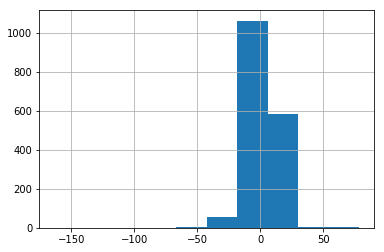

In [21]:
company_data['Sen

In [7]:
for i in trange(100):
    pass

NameError: name 'trange' is not defined

In [27]:
facts = []
cats = requests.get('https://cat-fact.herokuapp.com/facts').json()
from tqdm import tqdm
for i in tqdm(range(len(cats))):
    facts.append(cats['all'][i]['text'])

100%|██████████| 2/2 [00:00<00:00, 3303.90it/s]


In [26]:
pd.DataFrame(facts)



,0
0,Cats make about 100 different sounds. Dogs mak...
1,The technical term for a cat’s hairball is a b...
2,There are cats who have survived falls from ov...
3,Owning a cat can reduce the risk of stroke and...
4,"Wikipedia has a recording of a cat meowing, be..."
5,The world's largest cat measured 48.5 inches l...
6,Adult cats only meow to communicate with humans.
7,Cats can't taste sweetness.
8,rerewr
9,People who own cats have on average 2.1 pets p...
